In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 21.9 MB 144 kB/s
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 102 kB 49.5 MB/s 
     |████████████████████████████████| 690 kB 40.1 MB/s 
     |████████████████████████████████| 4.7 MB 34.6 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 52.4 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=6d058035885da530f670a5246f6424ffb08a8f40f38f26724ddd38f53852610e
  Stored in directory: /tmp/pip-ephem-wheel-cache-8w1zu9sa/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=fb9c70873335e4636526a55c857505648e3da09e15a2bf989056976ce3875fd3
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

# New Section

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import time
import warnings

from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline

In [ ]:
well_data = pd.read_csv("https://raw.githubusercontent.com/aravind9119/PROJECTS-DATASETS/main/DATA.csv")

In [ ]:
well_data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,Unnamed: 7,Unnamed: 8
0,3178.5,1,50.2190,0.5888,2.3296,0.3657,SH,NaN,NaN
1,3179.0,1,47.2468,0.7768,2.3170,0.3776,UN,NaN,3.0
2,3179.5,1,49.5247,1.0707,2.2960,0.5390,SH,NaN,NaN
3,3180.0,1,44.9124,1.4460,2.2514,0.5482,UN,NaN,NaN
4,3180.5,1,47.0048,0.9542,2.2733,0.5076,UN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3236,4083.5,2,59.7060,1.7590,2.4851,0.1416,CB,NaN,NaN
3237,4084.0,2,58.4170,1.6510,2.4860,0.1416,CB,NaN,NaN
3238,4084.5,2,57.4990,1.5970,2.5311,0.1527,CB,NaN,NaN
3239,4085.0,2,56.7850,1.4820,2.4731,0.1785,CB,NaN,NaN


In [ ]:
well_data.drop(columns=['Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

In [ ]:
well_data

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,1,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,1,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,1,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,1,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,1,47.0048,0.9542,2.2733,0.5076,UN
...,...,...,...,...,...,...,...
3236,4083.5,2,59.7060,1.7590,2.4851,0.1416,CB
3237,4084.0,2,58.4170,1.6510,2.4860,0.1416,CB
3238,4084.5,2,57.4990,1.5970,2.5311,0.1527,CB
3239,4085.0,2,56.7850,1.4820,2.4731,0.1785,CB


In [ ]:
well_data.describe()

,Depth,Well,GR,RT,RHOB,NPHI
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,3733.609380,1.357606,51.379917,4.292569,2.432688,0.207456
std,265.253354,0.479369,57.700965,14.524740,0.147662,0.104241
min,3178.500000,1.000000,3.655000,0.094000,1.805100,0.013500
25%,3542.000000,1.000000,17.433000,1.014000,2.311000,0.133600
50%,3747.500000,1.000000,34.083600,1.864900,2.459000,0.187900
75%,3950.500000,2.000000,71.846000,3.697700,2.550000,0.267500
max,4220.500000,2.000000,1567.590000,461.170000,3.149300,0.853200


In [ ]:
well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   3241 non-null   float64
 1   Well    3241 non-null   int64  
 2   GR      3241 non-null   float64
 3   RT      3241 non-null   float64
 4   RHOB    3241 non-null   float64
 5   NPHI    3241 non-null   float64
 6   Facies  3241 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 177.4+ KB


In [ ]:
well_data.isnull().sum()

Depth     0
Well      0
GR        0
RT        0
RHOB      0
NPHI      0
Facies    0
dtype: int64

In [ ]:
ProfileReport(well_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
well_data['RT_log'] = np.log10(well_data.RT)

In [ ]:
well_data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,3178.5,1,50.2190,0.5888,2.3296,0.3657,SH,-0.230032
1,3179.0,1,47.2468,0.7768,2.3170,0.3776,UN,-0.109691
2,3179.5,1,49.5247,1.0707,2.2960,0.5390,SH,0.029668
3,3180.0,1,44.9124,1.4460,2.2514,0.5482,UN,0.160168
4,3180.5,1,47.0048,0.9542,2.2733,0.5076,UN,-0.020361
...,...,...,...,...,...,...,...,...
3236,4083.5,2,59.7060,1.7590,2.4851,0.1416,CB,0.245266
3237,4084.0,2,58.4170,1.6510,2.4860,0.1416,CB,0.217747
3238,4084.5,2,57.4990,1.5970,2.5311,0.1527,CB,0.203305
3239,4085.0,2,56.7850,1.4820,2.4731,0.1785,CB,0.170848


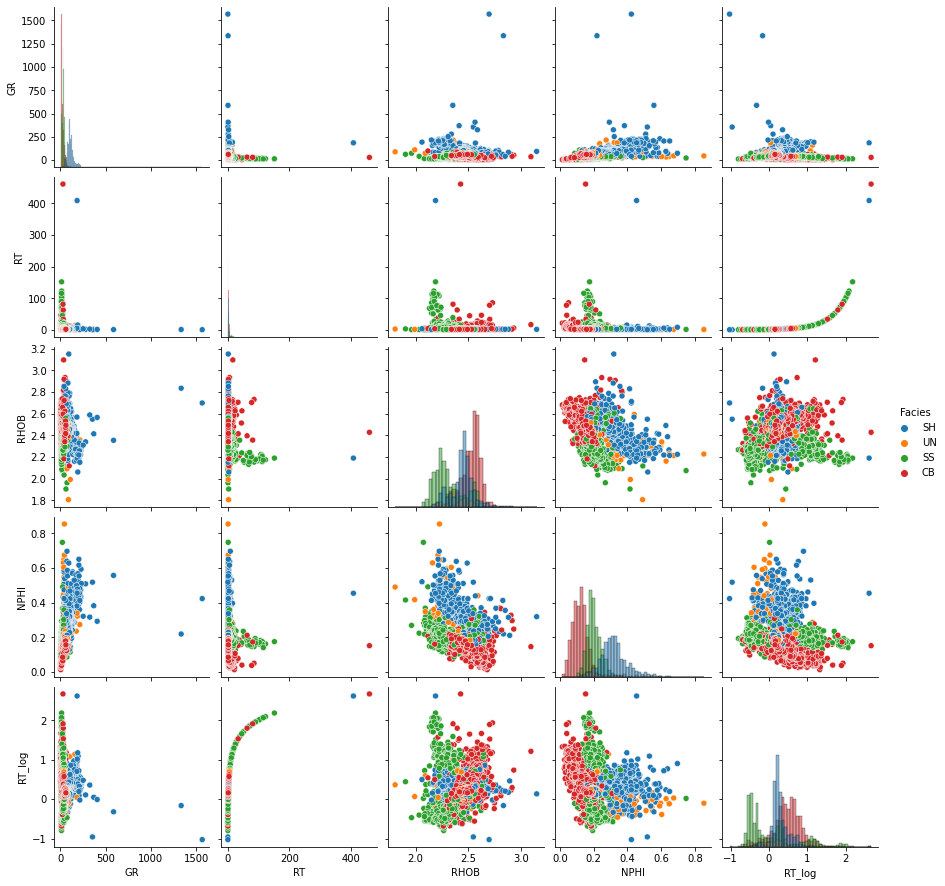

In [ ]:
sns.pairplot(well_data.drop(['Well','Depth'], axis = 1) ,hue='Facies',diag_kind='hist')

In [ ]:
labels = [1,2,3,4] 
well_data['Facies_Label']=np.select([well_data['Facies'] == 'SH',
                                well_data['Facies'] == 'UN',
                                well_data['Facies'] == 'SS',
                                well_data['Facies'] == 'CB',]
                                ,labels)

In [ ]:
well_data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Facies_Label
0,3178.5,1,50.2190,0.5888,2.3296,0.3657,SH,-0.230032,1
1,3179.0,1,47.2468,0.7768,2.3170,0.3776,UN,-0.109691,2
2,3179.5,1,49.5247,1.0707,2.2960,0.5390,SH,0.029668,1
3,3180.0,1,44.9124,1.4460,2.2514,0.5482,UN,0.160168,2
4,3180.5,1,47.0048,0.9542,2.2733,0.5076,UN,-0.020361,2
...,...,...,...,...,...,...,...,...,...
3236,4083.5,2,59.7060,1.7590,2.4851,0.1416,CB,0.245266,4
3237,4084.0,2,58.4170,1.6510,2.4860,0.1416,CB,0.217747,4
3238,4084.5,2,57.4990,1.5970,2.5311,0.1527,CB,0.203305,4
3239,4085.0,2,56.7850,1.4820,2.4731,0.1785,CB,0.170848,4


In [ ]:
facies_colors = ['#2E86C1', '#196F3D','#F4D03F','#DC7633']

facies = ['SH', 'UN', 'SS', 'CB']

def facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors, 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies_Label'].values,1), 100,1)
    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.RT_log, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.RHOB, logs.Depth, '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                   cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((50*' ').join(['SH', 'UN', 'SS', 'CB']))
    cbar.set_ticks(range(0,100)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RT")
    ax[1].set_xlim(logs.RT_log.min(),logs.RT_log.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    ax[4].set_xticklabels([])
    fig.suptitle('Well: %s'%logs.iloc[20]['Well'], fontsize=14,y=0.94)

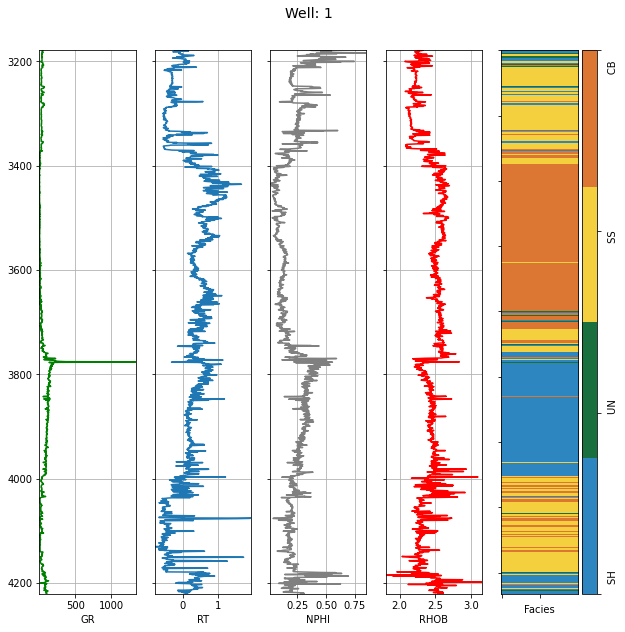

In [ ]:
facies_log_plot(well_data[well_data['Well'] == 1],facies_colors)

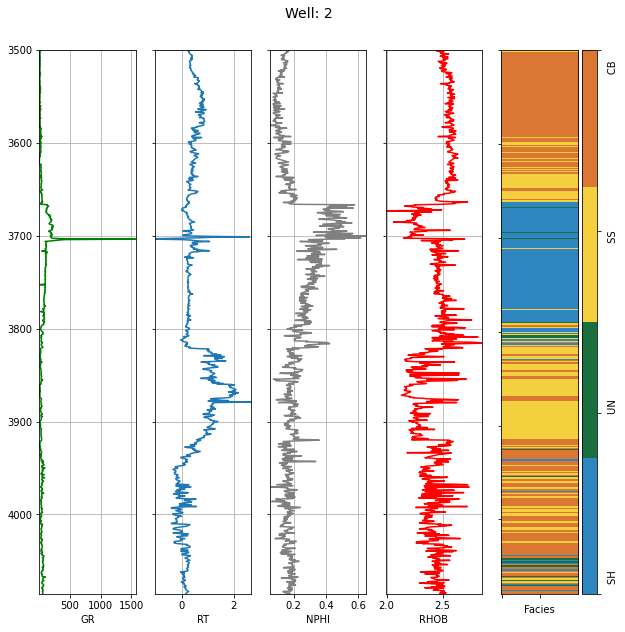

In [ ]:
facies_log_plot(well_data[well_data['Well'] == 2],facies_colors)

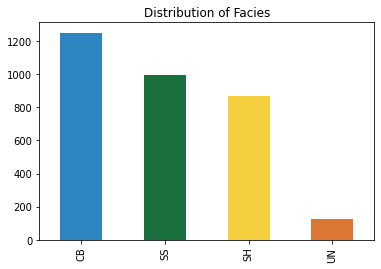

In [ ]:
Facies_dist = well_data['Facies'].value_counts()

Facies_dist.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Facies')

In [ ]:
well_data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Facies_Label
0,3178.5,1,50.2190,0.5888,2.3296,0.3657,SH,-0.230032,1
1,3179.0,1,47.2468,0.7768,2.3170,0.3776,UN,-0.109691,2
2,3179.5,1,49.5247,1.0707,2.2960,0.5390,SH,0.029668,1
3,3180.0,1,44.9124,1.4460,2.2514,0.5482,UN,0.160168,2
4,3180.5,1,47.0048,0.9542,2.2733,0.5076,UN,-0.020361,2
...,...,...,...,...,...,...,...,...,...
3236,4083.5,2,59.7060,1.7590,2.4851,0.1416,CB,0.245266,4
3237,4084.0,2,58.4170,1.6510,2.4860,0.1416,CB,0.217747,4
3238,4084.5,2,57.4990,1.5970,2.5311,0.1527,CB,0.203305,4
3239,4085.0,2,56.7850,1.4820,2.4731,0.1785,CB,0.170848,4


In [ ]:
#Setting Depth as Index for marking purpose
# well_data.reset_index()


well_data.groupby("Well").count()

well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth         3241 non-null   float64
 1   Well          3241 non-null   int64  
 2   GR            3241 non-null   float64
 3   RT            3241 non-null   float64
 4   RHOB          3241 non-null   float64
 5   NPHI          3241 non-null   float64
 6   Facies        3241 non-null   object 
 7   RT_log        3241 non-null   float64
 8   Facies_Label  3241 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 228.0+ KB


In [ ]:
well_data.columns

Index(['Depth', 'Well', 'GR', 'RT', 'RHOB', 'NPHI', 'Facies', 'RT_log',
       'Facies_Label'],
      dtype='object')

In [ ]:
well_data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Facies_Label
0,3178.5,1,50.2190,0.5888,2.3296,0.3657,SH,-0.230032,1
1,3179.0,1,47.2468,0.7768,2.3170,0.3776,UN,-0.109691,2
2,3179.5,1,49.5247,1.0707,2.2960,0.5390,SH,0.029668,1
3,3180.0,1,44.9124,1.4460,2.2514,0.5482,UN,0.160168,2
4,3180.5,1,47.0048,0.9542,2.2733,0.5076,UN,-0.020361,2
...,...,...,...,...,...,...,...,...,...
3236,4083.5,2,59.7060,1.7590,2.4851,0.1416,CB,0.245266,4
3237,4084.0,2,58.4170,1.6510,2.4860,0.1416,CB,0.217747,4
3238,4084.5,2,57.4990,1.5970,2.5311,0.1527,CB,0.203305,4
3239,4085.0,2,56.7850,1.4820,2.4731,0.1785,CB,0.170848,4


In [ ]:
X = well_data.drop(['Facies','Facies_Label','RT_log','Depth'], axis = 1) 
#Features: Feature vector
y = well_data['Facies'] 
#Target: Facies

In [ ]:
X

,Well,GR,RT,RHOB,NPHI
0,1,50.2190,0.5888,2.3296,0.3657
1,1,47.2468,0.7768,2.3170,0.3776
2,1,49.5247,1.0707,2.2960,0.5390
3,1,44.9124,1.4460,2.2514,0.5482
4,1,47.0048,0.9542,2.2733,0.5076
...,...,...,...,...,...
3236,2,59.7060,1.7590,2.4851,0.1416
3237,2,58.4170,1.6510,2.4860,0.1416
3238,2,57.4990,1.5970,2.5311,0.1527
3239,2,56.7850,1.4820,2.4731,0.1785


In [ ]:
#splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
print('Dimensions of X_train:',X_train.shape)
print('Dimensions of X_test:',X_test.shape)

Dimensions of X_train: (2268, 5)
Dimensions of X_test: (973, 5)


In [ ]:
X_train

,Well,GR,RT,RHOB,NPHI
1557,1,96.8273,1.4131,2.4470,0.2886
341,1,29.4533,0.3319,2.1855,0.2314
579,1,5.9483,7.0130,2.6040,0.0642
1412,1,125.7879,1.4531,2.4600,0.3380
2803,2,22.9630,89.0210,2.1741,0.1930
...,...,...,...,...,...
1372,1,122.0454,1.3979,2.4603,0.2360
2398,2,56.6610,1.9690,2.5258,0.1803
2119,2,14.9110,2.0960,2.5109,0.1396
599,1,14.5110,3.2803,2.5780,0.1076


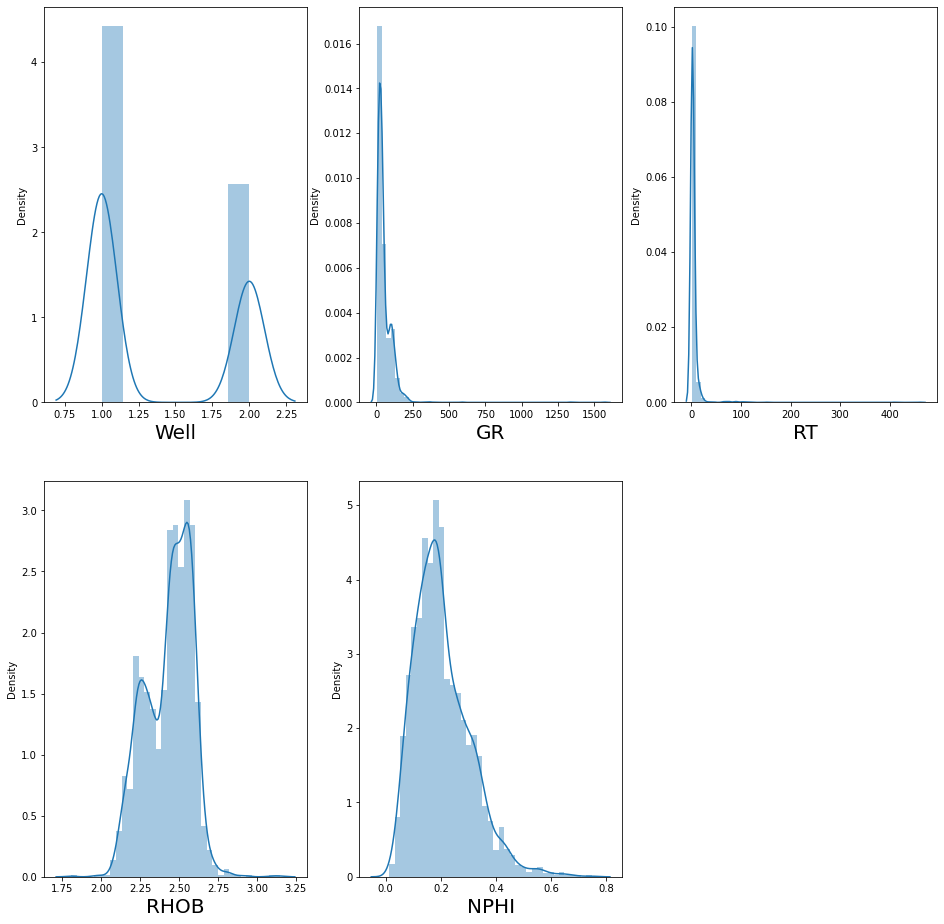

In [ ]:
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in X_train:
    if plotnumber<=5 :     # as there are 4 columns in the X_train
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(X_train[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
#Types of scaling methods  - 
#1) Min Max Scaler
#2) Standard Scaler
#3) Max Abs Scaler
#4) Robust Scaler
#5) Quantile Transformer Scaler
#6) Power Transformer Scaler
#7) Unit Vector Scaler


# Source - https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [ ]:
# Robust Scaler
rscaler = RobustScaler() #instantiate
rscaler.fit(X_train)

RobustScaler()

In [ ]:
X_train_scaled = rscaler.transform(X_train) # transform the train dataset to standardized data

# Original training dataset
print("Original median : %s " % rscaler.center_)
print("Original IQR : %s " % rscaler.scale_)

#Scaled training dataset
print("Scaled median : %s " % np.median(X_train_scaled,axis=0))
print("Scaled IQR : %s " % (np.percentile(X_train_scaled, 75,axis=0)-np.percentile(X_train_scaled, 25,axis=0)))

Original median : [ 1.     33.7498  1.8525  2.458   0.1876] 
Original IQR : [ 1.       50.22925   2.7383    0.23975   0.131825] 
Scaled median : [0. 0. 0. 0. 0.] 
Scaled IQR : [1. 1. 1. 1. 1.] 


In [ ]:
#Scale the test data using the parameters learnt from the training dataset
X_test_scaled  = rscaler.transform(X_test)

print("Median of scaled test data: %s" % np.median(X_test_scaled,axis=0))
print("IQR of scaled test data: %s " % (np.percentile(X_test_scaled, 75,axis=0)-np.percentile(X_test_scaled, 25,axis=0)))

Median of scaled test data: [0.         0.02342858 0.01150349 0.00834202 0.00758581]
IQR of scaled test data: [1.         1.24073722 0.92243363 0.98435871 1.06125545] 


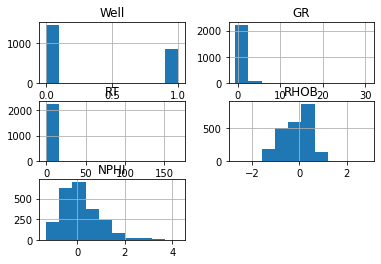

In [ ]:
pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_test.columns).hist()
plt.show()

In [ ]:
X_train=pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_test.columns)
X_test=pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)
X_test

,Well,GR,RT,RHOB,NPHI
203,0.0,0.350591,-0.449732,-1.118248,0.934572
2075,0.0,1.375298,-0.336194,0.618144,-0.424806
2352,1.0,-0.028625,0.359530,0.742023,-0.302674
1946,0.0,-0.246319,-0.576818,-0.709072,-0.007586
1817,0.0,-0.230364,-0.545448,-0.699896,0.005310
...,...,...,...,...,...
2470,1.0,2.998456,-0.275536,-1.017310,1.143941
1286,0.0,2.410683,0.155023,-0.470907,1.302484
2648,1.0,1.018952,-0.050579,0.012513,0.749478
2060,0.0,0.909400,0.073513,0.137643,-0.586383


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif["Features"] = X_test.columns

#let's check the values
vif

,vif,Features
0,1.089240,Well
1,1.686028,GR
2,1.070272,RT
3,1.403374,RHOB
4,2.095773,NPHI


OUTLIER DETECTION

In [ ]:
# Isolation Forest for outliers
iforest = IsolationForest(n_estimators=200, contamination=0.5/100)
iforest = iforest.fit(X_train) #Training the model

In [ ]:
#Predictions
X_train_predict = iforest.predict(X_train) 
X_train['Predict']=X_train_predict
X_train['Predict'] = X_train['Predict'].astype('category')
X_train

,Well,GR,RT,RHOB,NPHI,Predict
1557,0.0,1.255792,-0.160465,-0.045881,0.766167,1
341,0.0,-0.085538,-0.555308,-1.136601,0.332259,1
579,0.0,-0.553492,1.884563,0.608968,-0.936090,1
1412,0.0,1.832361,-0.145857,0.008342,1.140907,1
2803,1.0,-0.214751,31.833072,-1.184150,0.040963,1
...,...,...,...,...,...,...
1372,0.0,1.757852,-0.166015,0.009593,0.367153,1
2398,1.0,0.456133,0.042545,0.282795,-0.055376,1
2119,1.0,-0.375056,0.088924,0.220647,-0.364119,1
599,0.0,-0.383020,0.521418,0.500521,-0.606865,1


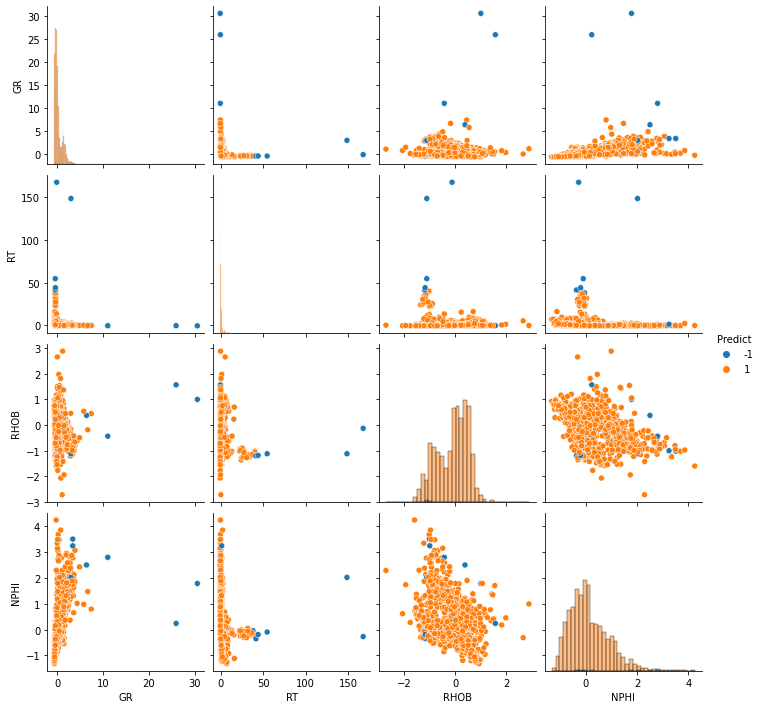

In [ ]:
#Visualization
sns.pairplot(X_train.drop('Well',axis=1,inplace=False),hue='Predict',diag_kind = 'hist')

In [ ]:
y_train

1557    SH
341     SS
579     CB
1412    SH
2803    SS
        ..
1372    SH
2398    SS
2119    CB
599     CB
1459    SH
Name: Facies, Length: 2268, dtype: object

In [ ]:
#Removing Outliers
X_train['y']=y_train
X_train = X_train[X_train['Predict'] == 1]

y_train=X_train['y']
X_train = X_train.drop(['Predict','y'], axis = 1)

In [ ]:
X_train

,Well,GR,RT,RHOB,NPHI
1557,0.0,1.255792,-0.160465,-0.045881,0.766167
341,0.0,-0.085538,-0.555308,-1.136601,0.332259
579,0.0,-0.553492,1.884563,0.608968,-0.936090
1412,0.0,1.832361,-0.145857,0.008342,1.140907
2803,1.0,-0.214751,31.833072,-1.184150,0.040963
...,...,...,...,...,...
1372,0.0,1.757852,-0.166015,0.009593,0.367153
2398,1.0,0.456133,0.042545,0.282795,-0.055376
2119,1.0,-0.375056,0.088924,0.220647,-0.364119
599,0.0,-0.383020,0.521418,0.500521,-0.606865


In [ ]:
y_train

1557    SH
341     SS
579     CB
1412    SH
2803    SS
        ..
1372    SH
2398    SS
2119    CB
599     CB
1459    SH
Name: y, Length: 2256, dtype: object

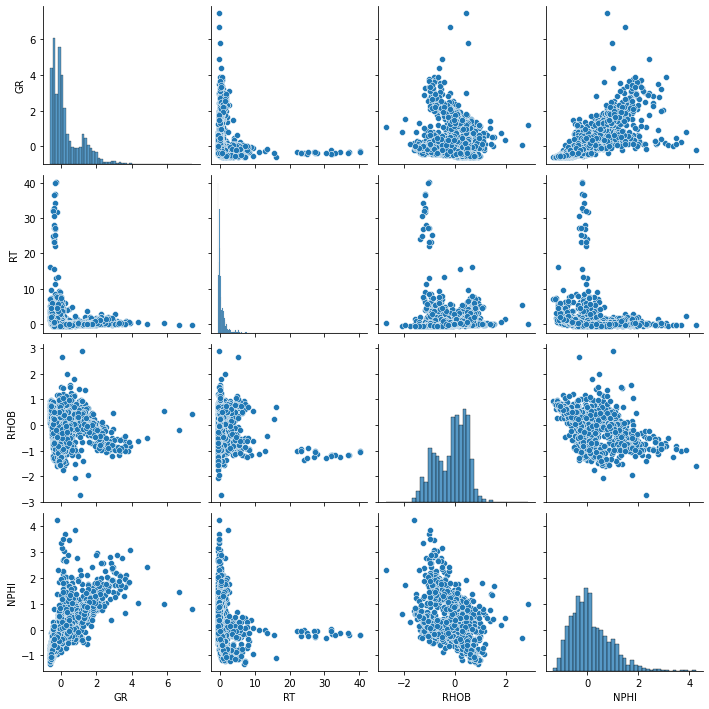

In [ ]:
#Visualization Without Outliers
sns.pairplot(X_train.drop('Well',axis=1,inplace=False),diag_kind='hist')

Logistic Regression

In [ ]:
classifier = LogisticRegression(C=12) 
classifier.fit(X_train, y_train)

print(classifier.coef_) #a1 and a2
print(classifier.intercept_) # a0

[[ 0.35053097 -3.9429615   0.26627418  0.29270467 -4.31492024]
 [-0.01502512  4.97452045 -0.5507009   1.47518525  2.89181457]
 [-0.34676994 -2.61363482  0.37688089 -1.45535378 -0.21075483]
 [ 0.01126408  1.58207587 -0.09245418 -0.31253614  1.63386049]]
[ 1.5950627  -2.96923689  2.29422113 -0.92004693]


In [ ]:
prediction = classifier.predict(X_test)

In [ ]:
#Compare against true labels (Accuracy)
print('Accuracy (generalization)',classifier.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',classifier.score(X_train,y_train)) #Accuracy (memorization)

Accuracy (generalization) 0.8458376156217883
Accuracy (memorization) 0.8550531914893617


In [ ]:
#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,classifier.predict(X_test),average="weighted")) #Accuracy (generalization)  
print('F1_score (memorization)',f1_score(y_train,classifier.predict(X_train),average="weighted")) #Accuracy (memorization) 

F1_score (generalization) 0.8330089717622626
F1_score (memorization) 0.8434963214482306


In [ ]:
# model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)

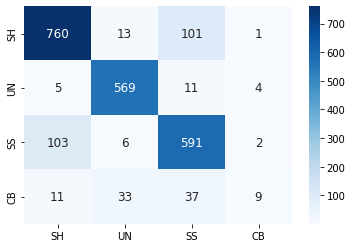

In [ ]:
names = ['SH', 'UN', 'SS', 'CB']

cf_matrix = confusion_matrix(y_train, classifier.predict(X_train))

cf=sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=names,yticklabels=names)

plt.show()

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predi_DT = clf_DT.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predi_DT)

0.8468653648509764

In [ ]:
from sklearn.model_selection import GridSearchCV 

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

grid_search = GridSearchCV(estimator=clf_DT,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
clf_DTCV = DecisionTreeClassifier(criterion= 'gini', max_depth = 7, min_samples_leaf= 2, min_samples_split= 7, splitter='best')
clf_DTCV.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=7)

In [ ]:
y_predi_DTCV = clf_DTCV.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predi_DTCV)

0.8663926002055499

Random Forest

In [ ]:
cforest = RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=5,random_state=1, n_jobs=2) #Creating Instance
cforest.fit(X_train, y_train) #Learning the decision boundaries
y_pred = cforest.predict(X_test)

In [ ]:
#Compare against true labels (Accuracy)
print('Accuracy (generalization)',cforest.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',cforest.score(X_train,y_train)) #Accuracy (memorization)

Accuracy (generalization) 0.8746145940390545
Accuracy (memorization) 0.8931737588652482


In [ ]:
#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,cforest.predict(X_test),average="weighted")) #F1_score (generalization)  
print('F1_score (memorization)',f1_score(y_train,cforest.predict(X_train),average="weighted")) #F1_score (memorization)  

F1_score (generalization) 0.8689308636711555
F1_score (memorization) 0.8885570548321415


In [ ]:
from sklearn.model_selection import GridSearchCV 
  
#Defining parameter range 
Tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'C': [0.1, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'],'C': [1, 10, 100, 1000],'degree': [2,3,4]}]
  
svc_mod = GridSearchCV(SVC(), Tuned_parameters, refit = True, verbose = 3) 

In [ ]:
svc_mod.fit(X_train, y_train) 
svc_mod.best_estimator_

Fitting 5 folds for each of 41 candidates, totalling 205 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.843 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.808 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=100, gamma=0.1)

In [ ]:
print(svc_mod.best_params_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#Performance (Accuracy)
print('Accuracy (generalization)',svc_mod.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',svc_mod.score(X_train,y_train)) #Accuracy (memorization)

#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,svc_mod.predict(X_test),average="weighted")) #F1_score (generalization)  
print('F1_score (memorization)',f1_score(y_train,svc_mod.predict(X_train),average="weighted")) #F1_score (memorization) 

Accuracy (generalization) 0.8787255909558068
Accuracy (memorization) 0.9002659574468085
F1_score (generalization) 0.877651655404068
F1_score (memorization) 0.8985560346398964


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
y_pred_KNN =KNN_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_KNN)

0.8735868448098664

In [ ]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [ ]:
# with GridSearch
grid_search_KNN = GridSearchCV(estimator=estimator_KNN, param_grid = parameters_KNN, scoring = 'accuracy', n_jobs = -1,cv = 5,verbose=1
)

In [ ]:
grid_KNN = grid_search_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
grid_KNN.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [ ]:
knn_model = KNeighborsClassifier(algorithm='auto',leaf_size = 20,metric= 'minkowski',n_neighbors= 10,p = 1,weights ='distance')

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1, weights='distance')

In [ ]:
y_pred_knn_best = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn_best)

0.880781089414183

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [ ]:
# Predicting the Test set results  
y_pred_NB = classifier.predict(X_test)  

In [ ]:
accuracy_score(y_test,y_pred_NB)

0.8201438848920863

In [ ]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=1000)}
nbModel_grid = GridSearchCV(estimator=classifier, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
GaussianNB(var_smoothing=0.00607832312829723)


In [ ]:
y_pred_Nbcv = nbModel_grid.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_Nbcv)

0.8396711202466598

In [ ]:
y_pred_knn_best

array(['SS', 'SH', 'CB', 'SS', 'SS', 'SS', 'SH', 'CB', 'CB', 'SS', 'CB',
       'CB', 'SH', 'CB', 'SS', 'SH', 'SH', 'CB', 'CB', 'SS', 'SH', 'SH',
       'SH', 'SH', 'SS', 'CB', 'CB', 'CB', 'CB', 'CB', 'SH', 'CB', 'SS',
       'SS', 'CB', 'SS', 'SS', 'CB', 'SS', 'SH', 'CB', 'SS', 'SH', 'SH',
       'SH', 'CB', 'SH', 'CB', 'SS', 'SS', 'CB', 'CB', 'CB', 'CB', 'CB',
       'SS', 'CB', 'UN', 'SS', 'CB', 'CB', 'SS', 'SS', 'SH', 'SH', 'CB',
       'CB', 'CB', 'SS', 'CB', 'CB', 'UN', 'CB', 'SS', 'SH', 'SS', 'SS',
       'SS', 'CB', 'CB', 'CB', 'SH', 'SH', 'SH', 'SS', 'CB', 'SH', 'SS',
       'SS', 'UN', 'SS', 'SS', 'CB', 'CB', 'CB', 'CB', 'SH', 'CB', 'SH',
       'UN', 'SS', 'SS', 'SH', 'SS', 'CB', 'CB', 'SH', 'SS', 'CB', 'SH',
       'CB', 'CB', 'SS', 'CB', 'SS', 'CB', 'SH', 'SS', 'SS', 'SS', 'CB',
       'UN', 'SH', 'SH', 'SS', 'SH', 'SH', 'SH', 'UN', 'SH', 'CB', 'CB',
       'CB', 'CB', 'UN', 'SS', 'CB', 'SH', 'SS', 'SS', 'CB', 'SH', 'SH',
       'SS', 'SH', 'SH', 'SH', 'SS', 'CB', 'SH', 'S

KNN with highest accuracy

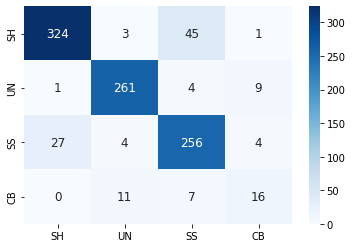

In [ ]:
names = ['SH', 'UN', 'SS', 'CB']

cf_matrix = confusion_matrix(y_test, y_pred_knn_best)

cf=sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=names,yticklabels=names)

plt.show()

In [ ]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))



In [ ]:
model = pickle.load(open("finalized_model.sav", "rb"))

well_data_testing1 = pd.read_csv("https://raw.githubusercontent.com/aravind9119/PROJECTS-DATASETS/main/Testing_Data.csv")
well_data_testing2 = pd.read_csv("https://raw.githubusercontent.com/aravind9119/PROJECTS-DATASETS/main/Testing_Data.csv")

In [ ]:
well_data_testing1

,Depth,Well,GR,RT,RHOB,NPHI
0,4175.5,13,20.6032,4.1812,2.6117,0.0770
1,4176.0,13,21.4990,4.5516,2.6131,0.0798
2,4176.5,13,22.4472,4.4804,2.6334,0.0801
3,4177.0,13,29.6713,4.3859,2.6328,0.1005
4,4177.5,13,34.7014,4.8566,2.6183,0.1001
...,...,...,...,...,...,...
822,4586.5,13,68.1668,1.3877,2.5219,0.1587
823,4587.0,13,71.9559,1.3800,2.5062,0.1739
824,4587.5,13,67.5752,1.3391,2.5030,0.1704
825,4588.0,13,65.0492,1.3286,2.4855,0.1754


In [ ]:
well_data_testing1 = well_data_testing1.drop("Depth",axis=1)
rscaler = RobustScaler() #instantiate
rscaler.fit(well_data_testing1)
scaled = rscaler.transform(well_data_testing1)

In [ ]:
scaled_pd = pd.DataFrame(scaled,columns=well_data_testing1.columns)

In [ ]:
scaled_pd

,Well,GR,RT,RHOB,NPHI
0,0.0,-1.335992,1.367288,0.540902,-1.325209
1,0.0,-1.293355,1.557081,0.548692,-1.282559
2,0.0,-1.248223,1.520598,0.661658,-1.277989
3,0.0,-0.904374,1.472177,0.658319,-0.967251
4,0.0,-0.664955,1.713363,0.577629,-0.973343
...,...,...,...,...,...
822,0.0,0.927911,-0.064101,0.041180,-0.080731
823,0.0,1.108263,-0.068047,-0.046188,0.150800
824,0.0,0.899753,-0.089004,-0.063996,0.097487
825,0.0,0.779522,-0.094384,-0.161380,0.173648


In [ ]:
# use model to predict
y_pred_testing = model.predict(scaled_pd)

In [ ]:
# logistic 84.58
# dt = 85.200
# dtcv = 86.74
# randomforest = 87.46
# svccv = 87.87
# knn = 87.35
# knncv = 88.70
# nb = 82.01
# nbcv = 83.65

In [ ]:
y_pred_testing

array(['CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'SH', 'SH', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'SS', 'CB',
       'SS', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'SS',
       'SS', 'UN', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB',
       'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'CB', 'C

In [ ]:
well_data_testing2["Facies"] = y_pred_testing

In [ ]:
well_data_testing2['RT_log'] = np.log10(well_data_testing2.RT)

In [ ]:
well_data_testing2

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,4175.5,13,20.6032,4.1812,2.6117,0.0770,CB,0.621301
1,4176.0,13,21.4990,4.5516,2.6131,0.0798,CB,0.658164
2,4176.5,13,22.4472,4.4804,2.6334,0.0801,CB,0.651317
3,4177.0,13,29.6713,4.3859,2.6328,0.1005,CB,0.642059
4,4177.5,13,34.7014,4.8566,2.6183,0.1001,CB,0.686332
...,...,...,...,...,...,...,...,...
822,4586.5,13,68.1668,1.3877,2.5219,0.1587,SH,0.142296
823,4587.0,13,71.9559,1.3800,2.5062,0.1739,SH,0.139879
824,4587.5,13,67.5752,1.3391,2.5030,0.1704,SH,0.126813
825,4588.0,13,65.0492,1.3286,2.4855,0.1754,SH,0.123394


In [ ]:
labels = [1,2,3,4] 
well_data_testing2['Facies_Label']=np.select([well_data_testing2['Facies'] == 'SH',
                                well_data_testing2['Facies'] == 'UN',
                                well_data_testing2['Facies'] == 'SS',
                                well_data_testing2['Facies'] == 'CB',]
                                ,labels)

In [ ]:
well_data_testing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth         827 non-null    float64
 1   Well          827 non-null    int64  
 2   GR            827 non-null    float64
 3   RT            827 non-null    float64
 4   RHOB          827 non-null    float64
 5   NPHI          827 non-null    float64
 6   Facies        827 non-null    object 
 7   RT_log        827 non-null    float64
 8   Facies_Label  827 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 58.3+ KB


**Final prediction of lithology**

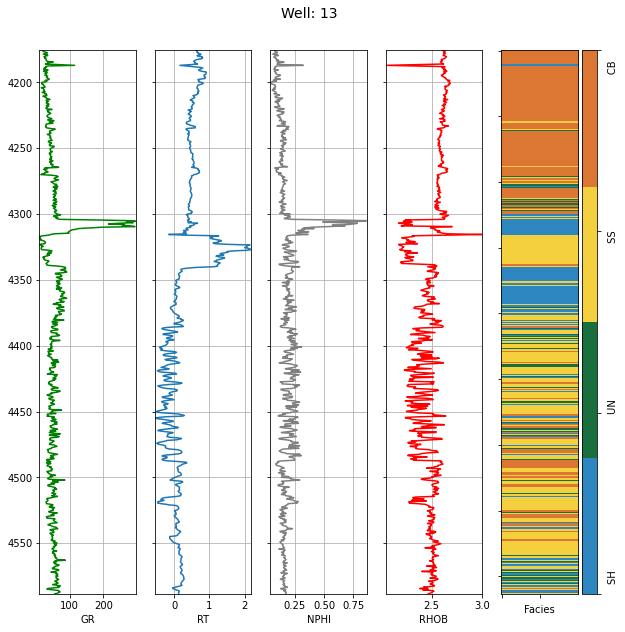

In [ ]:
facies_log_plot(well_data_testing2,facies_colors)